# This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df= pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*Important point always take a copy of your dataset*

In [6]:
Copy_df= df.copy()

To check the descriptive statistics for numerical variables in the Data

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1) Check any missing values or NA//
2) Checking about the numerical variables//
3) Checking about the categorical variables//
4) Checking relationship between variables or features//

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values/NA in the dataset

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df_exited_counts= df.Exited.value_counts()

<AxesSubplot:xlabel='Exited', ylabel='count'>

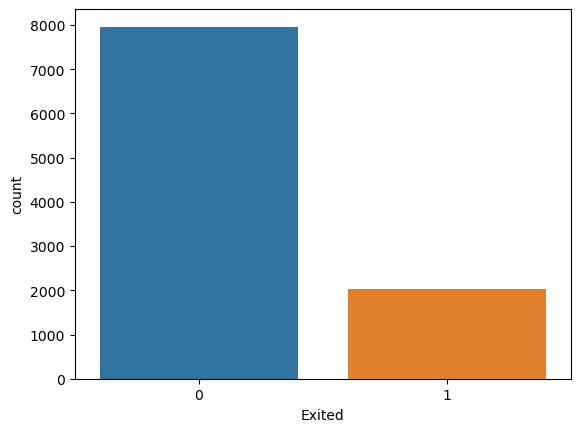

In [12]:
sns.countplot(df['Exited'])

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Dropping irrelevant features

In [14]:
newdf= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [15]:
newdf.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Encoding categorical variables

In [16]:
newdf.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Here we have two categorical variables lets encode each one by one.

In [17]:
newdf['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
newdf['Gender'].unique()

array(['Female', 'Male'], dtype=object)

As we can see in the Geography and gender(Nominal) column there is no any relationship order between this countries we need to avoid such interpretation. (Solution: Need to convert into binary vector it will be converted into 3 new columns as we have 3 unique values)

In [19]:
newdf= pd.get_dummies(newdf, drop_first=True)
newdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
newdf.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [21]:
newdf.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

As we had already checked above in the countplot our Exited variable('Y') dataset is Imbalanced dataset(Traget class has uneven dataset of distribution) Lets check it again!!

<AxesSubplot:xlabel='Exited', ylabel='count'>

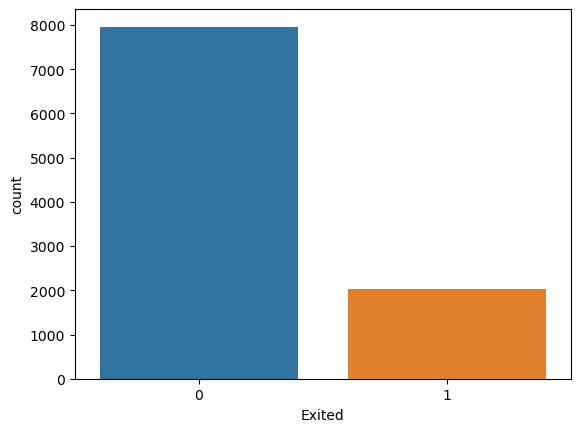

In [22]:
sns.countplot(df['Exited'])

'0' represents not leaving the bank &
 '1' represents leaving the bank

### Separating dependent and independent variable

In [23]:
X= newdf.drop('Exited', axis=1)
y= newdf['Exited']

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Splitting The Dataset into the Training Set and Test Set

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=28,stratify=y) 

Using Standard Scaler for feature scaling (As ML algorithms requires scaling are 'KNN', Neural networks, SVM, Linear regression and Logistic regression) AND (As ML algorithms **'DO NOT'** requires scaling are 'Decision tree', 'Random forest', 'Naive Bayes','AdaBoost') Any algorithm which is not distance based is not affect by scaling

In [27]:
Scaler= StandardScaler()

In [28]:
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)

In [29]:
X_train

array([[ 0.8892051 , -0.09086925,  0.33779456, ..., -0.57754272,
         1.72801876,  0.90682052],
       [ 0.39385496,  2.29383748, -1.38850956, ..., -0.57754272,
         1.72801876, -1.10275404],
       [-0.72068286,  0.3860721 ,  1.37357702, ..., -0.57754272,
         1.72801876,  0.90682052],
       ...,
       [-0.36980984,  0.19529556,  1.37357702, ..., -0.57754272,
         1.72801876, -1.10275404],
       [ 0.21841845, -0.47242233,  0.33779456, ..., -0.57754272,
        -0.57869742,  0.90682052],
       [ 0.09458092,  0.29068383, -0.00746627, ..., -0.57754272,
         1.72801876,  0.90682052]])

In [30]:
X_test

array([[ 0.96144366, -1.23552848, -0.00746627, ..., -0.57754272,
         1.72801876, -1.10275404],
       [ 0.08426112, -0.09086925,  1.37357702, ..., -0.57754272,
         1.72801876, -1.10275404],
       [-0.32853066,  0.48146036,  0.33779456, ..., -0.57754272,
         1.72801876, -1.10275404],
       ...,
       [ 1.03368223,  1.43534306,  1.37357702, ...,  1.73147365,
        -0.57869742,  0.90682052],
       [ 0.09458092, -1.04475194, -1.04324873, ...,  1.73147365,
        -0.57869742,  0.90682052],
       [-0.54524635,  1.33995479,  1.71883785, ...,  1.73147365,
        -0.57869742,  0.90682052]])

### Logistic regression

In [31]:
log_reg= LogisticRegression()

In [32]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred1= log_reg.predict(X_test)

Lets check accuracy of this Logistic regression

In [34]:
accuracy_score(y_test,y_pred1)

0.8125

In [37]:
def my_confusion_matrix(y_test, pred_test):
    cm= confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap= plt.cm.Accent)
    cat_names= ['Not Churned', 'Churned']
    plt.title('Confusion Matrix - Test data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ticks= np.arange(len(cat_names))
    plt.xticks(ticks, cat_names, rotation=45)
    plt.yticks(ticks, cat_names)
    
    s=[['TN','FP'],['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

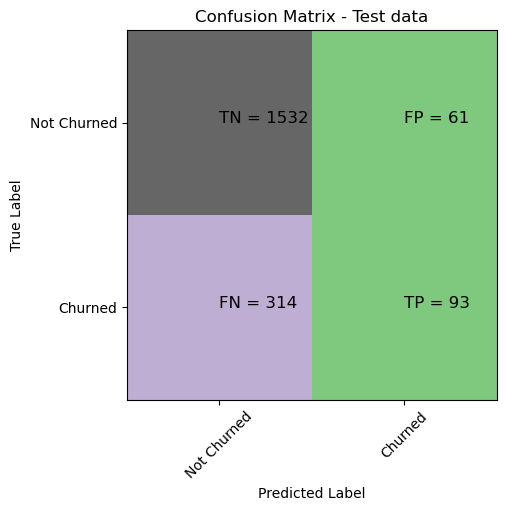

In [39]:
my_confusion_matrix(y_test,y_pred1)

As our data is imbalanced we are unable go only with accuracy score as for that we need to check 'precesion', 'recall' and 'f1 score' as well.

In [34]:
precision_score(y_test,y_pred1)

0.6038961038961039

In [35]:
recall_score(y_test,y_pred1)

0.2285012285012285

In [36]:
f1_score(y_test,y_pred1)

0.3315508021390375

## As our data is imbalanced data we will handle it with **SMOTE** which is Over-sampling method

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_resample, y_resample= SMOTE().fit_resample(X,y)

In [41]:
X_resample.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                1              1
689          67   9       157094.780000  1              1          1               99490.010000     1                  0                1              1
             49   4       0.000000       1              1          0               28331.003025     0                  0                0              1
             54   8       127072.045608  3              0          0               8358.919991      0                  0                1              1
             55   1       76296.810000   1              1          0               42364.750000     1                  0                0              1
                                                                                       

In [42]:
y_resample.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Here we can see that the data has been resampled.

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X_resample,y_resample,test_size=0.20, random_state=28)

In [44]:
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)

In [45]:
X_train

array([[-1.27809692e+00, -5.00647047e-01,  1.53120186e+00, ...,
        -5.74087353e-01,  2.16096782e+00, -8.38168077e-01],
       [ 5.58812806e-01,  1.81034711e+00,  5.99639168e-02, ...,
         1.74189519e+00, -4.62755618e-01, -8.38168077e-01],
       [-6.07366275e-02,  1.74298583e-03,  5.99639168e-02, ...,
         1.74189519e+00, -4.62755618e-01, -8.38168077e-01],
       ...,
       [ 9.17499319e-01,  2.31273714e+00, -6.75655053e-01, ...,
        -5.74087353e-01, -4.62755618e-01,  1.19307813e+00],
       [ 1.45779850e-01,  6.04611026e-01,  4.27773402e-01, ...,
        -5.74087353e-01, -4.62755618e-01, -8.38168077e-01],
       [-4.41161718e-01,  4.03655012e-01, -3.07845568e-01, ...,
        -5.74087353e-01,  2.16096782e+00,  1.19307813e+00]])

In [46]:
X_test

array([[-1.04213781e-01, -6.01125054e-01, -1.41127402e+00, ...,
        -5.74087353e-01, -4.62755618e-01, -8.38168077e-01],
       [ 4.39250634e-01, -2.99691034e-01, -1.04346454e+00, ...,
        -5.74087353e-01,  2.16096782e+00,  1.19307813e+00],
       [-1.23461976e+00, -6.01125054e-01,  1.16339237e+00, ...,
        -5.74087353e-01,  2.16096782e+00,  1.19307813e+00],
       ...,
       [ 1.06966936e+00,  2.02698999e-01,  1.53120186e+00, ...,
         1.74189519e+00, -4.62755618e-01,  1.19307813e+00],
       [ 2.18920605e+00, -1.99213027e-01, -1.77908351e+00, ...,
        -5.74087353e-01, -4.62755618e-01, -8.38168077e-01],
       [-1.32157407e+00,  1.74298583e-03,  1.89901134e+00, ...,
         1.74189519e+00, -4.62755618e-01, -8.38168077e-01]])

### After resampling lets check with Logistic regression 

In [47]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred1= log_reg.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred1)

0.7812303829252982

In [50]:
precision_score(y_test,y_pred1)

0.7657992565055762

In [51]:
recall_score(y_test,y_pred1)

0.794855305466238

In [52]:
f1_score(y_test,y_pred1)

0.7800568002524456

### As we can see now our precision score, recall score and f1 score is increased

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Support Vector Classifier

In [53]:
svm= svm.SVC()

In [54]:
svm.fit(X_train,y_train)

SVC()

In [58]:
y_pred2= svm.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred2)

0.834902699309479

In [60]:
precision_score(y_test, y_pred2)

0.8258391386953768

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### K-Nearest Neighbor(KNN) 

In [61]:
knn= KNeighborsClassifier()

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_pred3= knn.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred3)

0.8258003766478342

In [65]:
precision_score(y_test, y_pred3)

0.8090234857849197

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Decision Tree Classifier

In [66]:
dec_tree= DecisionTreeClassifier()

In [67]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred4 =dec_tree.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred4)

0.8072818581293157

In [70]:
precision_score(y_test, y_pred4)

0.7815679233991621

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

###  Random Forest Classifier

In [71]:
ran_forest= RandomForestClassifier()

In [72]:
ran_forest.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred5= ran_forest.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred5)

0.8640929064657878

In [75]:
precision_score(y_test,y_pred5)

0.8555133079847909

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Gradient Boosting Classifier 

In [76]:
gra_boost= GradientBoostingClassifier()

In [77]:
gra_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
y_pred6= gra_boost.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred6)

0.8355304456999372

In [80]:
precision_score(y_test, y_pred6)

0.8298144593730007

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Lets check and pick the best model with the best accuracy!!

In [81]:
best_model= pd.DataFrame({'Models':['LR','SVM','KNN','DTC','RFC','GBC'],
                          'Accuracy_S':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)],
                          'Precision_S':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)]
                          })

In [82]:
best_model

,Models,Accuracy_S,Precision_S
0,LR,0.781230,0.765799
1,SVM,0.834903,0.825839
2,KNN,0.825800,0.809023
3,DTC,0.807282,0.781568
4,RFC,0.864093,0.855513
5,GBC,0.835530,0.829814


<AxesSubplot:xlabel='Models', ylabel='Accuracy_S'>

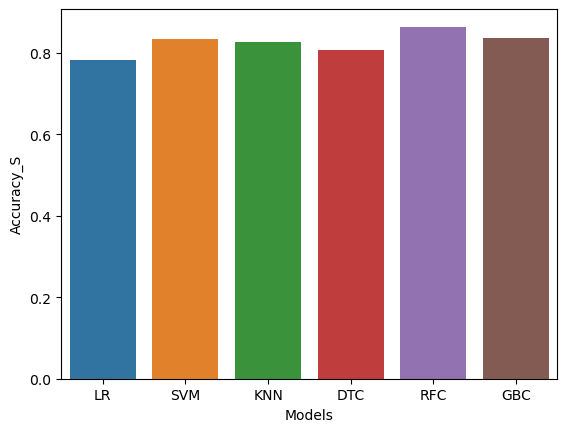

In [83]:
sns.barplot(best_model['Models'],best_model['Accuracy_S'])

<AxesSubplot:xlabel='Models', ylabel='Precision_S'>

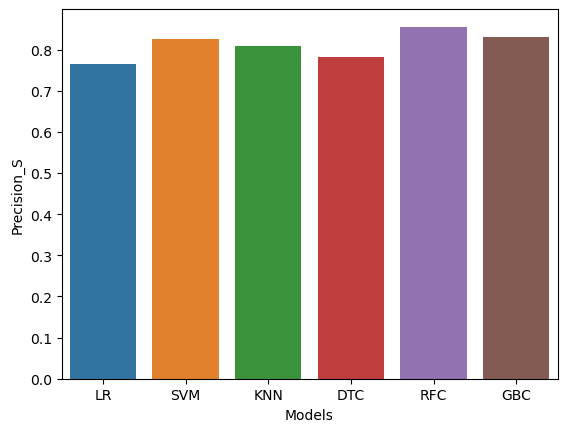

In [84]:
sns.barplot(best_model['Models'],best_model['Precision_S'])

## As we can see from both the plots the Random forest Classifier is the best model with the highest score

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Now we will use the Random forest Classifier to our entire data**

In [85]:
X_resample= Scaler.fit_transform(X_resample)

In [86]:
ran_forest.fit(X_resample,y_resample)

RandomForestClassifier()

### ------------------------------------------- To save our model ---------------------------------------------------------

In [87]:
import joblib 

In [88]:
joblib.dump(ran_forest,'Churn_Predict_Model')

['Churn_Predict_Model']

In [89]:
Saved_model= joblib.load('Churn_Predict_Model')

In [90]:
newdf.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [91]:
Saved_model.predict([[619,42,2,0.0,0,0,0,112542.58,0,1,0]])

array([1], dtype=int64)

**As the above output is one which means the above customer which has the same attributes can leave the bank**

In [92]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_field():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9==2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9==3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    Saved_model = joblib.load('Churn_Predict_Model')
    result= Saved_model.predict(Scaler.transform([p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]))
    
    if result ==0:
        Label(master, text='No Exit'),grid(row=31)
    else:
        Label(master, text='Exit'),grid(row=31)

master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning Model")

label= Label(master, text= 'Customers Churn Prediction Using ML', bg ='black',fg = 'white').grid (row=0,columnspan=2)

Label(master, text='CreditScore').grid(row=1)
Label(master, text='Age').grid(row=2)
Label(master, text='Tenure').grid(row=3)
Label(master, text='Balance').grid(row=4)
Label(master, text='NumOfProducts').grid(row=5)
Label(master, text='HasCrCard').grid(row=6)
Label(master, text='IsActiveMember').grid(row=7)
Label(master, text='EstimatedSalary').grid(row=8)
Label(master, text='Geography').grid(row=9)
Label(master, text='Gender').grid(row=10)


e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)
e7= Entry(master)
e8= Entry(master)
e9= Entry(master)
e10= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)

Button(master, text='Predict', command=show_entry_field).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\BIA\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Tushar\AppData\Local\Temp\ipykernel_2848\2941548981.py", line 2, in show_entry_field
    p1=int(e1.get())
ValueError: invalid literal for int() with base 10: ''
